In [1]:
from uncertain_dp2 import *

In [2]:
from pot_correction import *

In [3]:
import random
#random.seed(1)

In [4]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [5]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
# 0.47

In [6]:
most_likely_restorer_error_rate(reads)

[0.11428571428571428, 0.2, 0.08571428571428572, 0.14285714285714285, 0.17142857142857143, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.02857142857142857]


0.14

In [7]:
dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.11428571428571428, 0.22857142857142856, 0.08571428571428572, 0.14285714285714285, 0.17142857142857143, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.02857142857142857]


0.14285714285714285

In [8]:
check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.11428571428571428, 0.2, 0.08571428571428572, 0.14285714285714285, 0.17142857142857143, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.02857142857142857]
[0.11428571428571428, 0.22857142857142856, 0.08571428571428572, 0.14285714285714285, 0.17142857142857143, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.02857142857142857]


In [9]:
print(colored_edit_string(make_regular(A, A,A,G,C,T),make_regular(A,A,T,C, T, T),alignment_bonus=ALIGNMENT_BONUS))

XXXXXX...


In [10]:
print(colored_edit_string(make_regular(A,A,A,A,A,A,A,A,A,A,A,A,A,A,A),make_regular(A,A,A,A,A,A,A,A,A,A,A,A,A,A,A),alignment_bonus=ALIGNMENT_BONUS))

XXXXXXXXXXXXXXX


In [11]:
reads

In [12]:
r = reads[0]

In [13]:
r.original_text, r.predicted_text

('AGGGACGATGCCGAGACTTGTCAAGGAATCTAGAT', 'AGGGACGATGCCGATACTTGTCAAGGATTCTTGAA')

In [14]:
'GCCTACTGTAGTCAGGCATATACCAAAGTTGCACC'
'GCCTACTGAAGTTAGGCATATAACAAAGTTGCACA'

'GCCTACTGAAGTTAGGCATATAACAAAGTTGCACA'

In [15]:
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in reads]

               XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
           XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


[None, None, None, None, None, None, None, None, None, None]

In [16]:
reads[0]

In [17]:
corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=ALIGNMENT_BONUS)
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in corrected_reads]

               XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
           XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
            XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


[None, None, None, None, None, None, None, None, None, None]

In [18]:
DNA_LENGTH = 50           
READ_lENGTH = 35 
READ_COUNT = 10       

In [34]:
print(f"                        before after\n"+\
f"local edit distance     {most_likely_restorer_error_rate(reads):.3f} {most_likely_restorer_error_rate(corrected_reads):.3f}\n"+\
f"arbitrary dna alignment {dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS):.3f} {dna_distance_error_rate(dna, corrected_reads, alignment_bonus=ALIGNMENT_BONUS):.3f}")

[0.22857142857142856, 0.02857142857142857, 0.11428571428571428, 0.14285714285714285, 0.17142857142857143, 0.17142857142857143, 0.11428571428571428, 0.05714285714285714, 0.08571428571428572, 0.17142857142857143]
[0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22857142857142856, 0.02857142857142857, 0.11428571428571428, 0.14285714285714285, 0.17142857142857143, 0.17142857142857143, 0.11428571428571428, 0.05714285714285714, 0.08571428571428572, 0.17142857142857143]
[0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                        before after
local edit distance     0.129 0.003
arbitrary dna alignment 0.129 0.003


In [20]:
dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

[0.11428571428571428, 0.22857142857142856, 0.08571428571428572, 0.14285714285714285, 0.17142857142857143, 0.2, 0.17142857142857143, 0.11428571428571428, 0.17142857142857143, 0.02857142857142857]


0.14285714285714285

In [21]:
dna_distance_error_rate(dna, corrected_reads, alignment_bonus=ALIGNMENT_BONUS)

[0.05714285714285714, 0.08571428571428572, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.05714285714285714, 0.05714285714285714, 0.05714285714285714, 0.02857142857142857, 0.02857142857142857]


0.045714285714285714

In [22]:

before_correction = []
normal_correction = []
probabilistic_correction = []

for i in range(4):

    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

    corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS)
    probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)

    before_correction.append(dna_distance_error_rate(dna, reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    normal_correction.append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    probabilistic_correction.append(dna_distance_error_rate(dna, probabilistic_corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

print(before_correction, normal_correction, probabilistic_correction)


[None, None]
[None, None]
[None, None]
[None, None]
[0.2, 0.17142857142857143, 0.17142857142857143, 0.17142857142857143, 0.08571428571428572, 0.2571428571428571, 0.22857142857142856, 0.14285714285714285, 0.17142857142857143, 0.14285714285714285]
[0.0, 0.0, 0.08571428571428572, 0.05714285714285714, 0.02857142857142857, 0.0, 0.02857142857142857, 0.0, 0.0, 0.05714285714285714]
[0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.14285714285714285, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.11428571428571428]
[None, None]
[None, None]
[None, None]
[None, None]
[None, None]
[None, None]
[0.02857142857142857, 0.08571428571428572, 0.2, 0.14285714285714285, 0.11428571428571428, 0.17142857142857143, 0.11428571428571428, 0.2, 0.11428571428571428, 0.14285714285714285]
[0.0, 0.0, 0.05714285714285714, 0.02857142857142857, 0.0, 0.0, 0.0, 0.02857142857142857, 0.02857142857142857, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<BarContainer object of 3 artists>

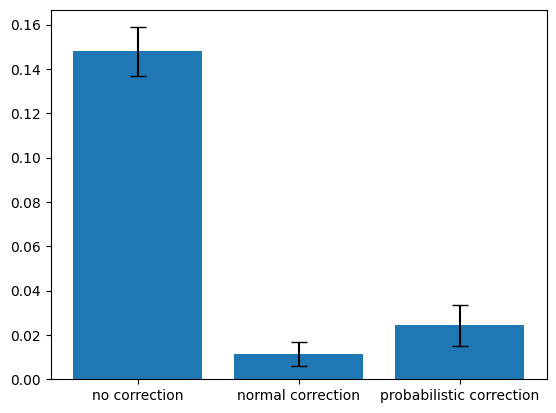

In [24]:
plt.bar(
    ["no correction", "normal correction", "probabilistic correction"],
    [np.mean(before_correction), np.mean(normal_correction), np.mean(probabilistic_correction)],
    yerr=[pd.Series(before_correction).sem(),pd.Series(normal_correction).sem(), pd.Series(probabilistic_correction).sem()],
    capsize=6
    )
#plt.ylim(0,0.02)

In [25]:
before_correction

[0.1742857142857143,
 0.13142857142857142,
 0.15714285714285714,
 0.12857142857142856]

In [26]:
# boni = [0.2,0.4,0.6,0.8,1]
# data = [[] for _ in range(len(boni))]
# 
# 
# for i in range(4):
    # dna = generate_dna(DNA_LENGTH)
    # reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    #probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    # for j in range(len(boni)):
        # corrected_reads = correct_reads_with_consens(reads, probabilistic=False, alignment_bonus=boni[j])
        # data[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=boni[j]))
# 
# data

In [27]:
# plt.bar(
    # [str(b) for b in boni],
    # [np.mean(boni_data) for boni_data in data],
    # yerr=[pd.Series(boni_data).sem() for boni_data in data],
    # capsize=6
    # )